In [ ]:
print("Hello!")

In [9]:
import json
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Markdown
import os

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –¥–ª—è –Ω–æ—É—Ç–±—É–∫–∞
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12

class NotebookOscillator:
    def __init__(self):
        self.simulator_path = "./oscillator_simulator"
        self.config = {
            "initial_position": 10.0,
            "initial_velocity": 0.0,
            "dt": 0.001,
            "w": 10.0,
            "simulation_time": 50.0,
            "output_file": "results.csv",
            "method": "RK4"
        }
        self.results = None
    
    def compile_simulator(self):
        result = subprocess.run([
            "g++", "-std=c++17", "-O3", "oscillator.cpp", 
            "-o", self.simulator_path
        ], capture_output=True, text=True)
        
        if result.returncode == 0:
            display(Markdown("–°–∏–º—É–ª—è—Ç–æ—Ä —É—Å–ø–µ—à–Ω–æ —Å–∫–æ–º–ø–∏–ª–∏—Ä–æ–≤–∞–Ω!"))
            return True
        else:
            display(Markdown("–û—à–∏–±–∫–∞ –∫–æ–º–ø–∏–ª—è—Ü–∏–∏:"))
            print(result.stderr)
            return False
    
    def set_parameters(self, **kwargs):
        for key, value in kwargs.items():
            if key in self.config:
                self.config[key] = value
    
    def show_parameters(self):
        display(Markdown("–¢–µ–∫—É—â–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Å–∏–º—É–ª—è—Ü–∏–∏"))
        params_df = pd.DataFrame([self.config])
        display(params_df)
    
    def run_simulation(self, config_file="config.json"):
        # –ü—Ä–æ–≤–µ—Ä—è–µ–º –Ω–∞–ª–∏—á–∏–µ —Å–∏–º—É–ª—è—Ç–æ—Ä–∞
        if not os.path.exists(self.simulator_path):
            if not self.compile_simulator():
                return False
        
        # –°–æ—Ö—Ä–∞–Ω—è–µ–º –∫–æ–Ω—Ñ–∏–≥—É—Ä–∞—Ü–∏—é
        with open(config_file, 'w') as f:
            json.dump(self.config, f, indent=2)
                
        # –ó–∞–ø—É—Å–∫–∞–µ–º —Å–∏–º—É–ª—è—Ü–∏—é
        result = subprocess.run([
            self.simulator_path, config_file
        ], capture_output=True, text=True)
        
        if result.returncode == 0:
            display(Markdown("–°–∏–º—É–ª—è—Ü–∏—è –∑–∞–≤–µ—Ä—à–µ–Ω–∞ —É—Å–ø–µ—à–Ω–æ!"))
            self._load_results()
            return True
        else:
            display(Markdown("–û—à–∏–±–∫–∞ —Å–∏–º—É–ª—è—Ü–∏–∏:"))
            print(result.stderr)
            return False
    
    def _load_results(self):
        output_file = self.config["output_file"]
        df = pd.read_csv(output_file)
        self.results = df
    
    def analyze(self):
        if self.results is None:
            display(Markdown("–°–Ω–∞—á–∞–ª–∞ –∑–∞–ø—É—Å—Ç–∏—Ç–µ —Å–∏–º—É–ª—è—Ü–∏—é!"))
            return
        
        display(Markdown("–ê–Ω–∞–ª–∏–∑ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤"))
        
        initial_energy = self.results['energy'].iloc[0]
        final_energy = self.results['energy'].iloc[-1]
        energy_drift_percent = ((final_energy - initial_energy) / initial_energy) * 100
        
        analysis_data = {
            "–ü–∞—Ä–∞–º–µ—Ç—Ä": ["–ú–µ—Ç–æ–¥", "–í—Ä–µ–º—è —Å–∏–º—É–ª—è—Ü–∏–∏", "–®–∞–≥ –≤—Ä–µ–º–µ–Ω–∏", 
                        "–ù–∞—á–∞–ª—å–Ω–∞—è —ç–Ω–µ—Ä–≥–∏—è", "–ö–æ–Ω–µ—á–Ω–∞—è —ç–Ω–µ—Ä–≥–∏—è", 
                        "–î—Ä–µ–π—Ñ —ç–Ω–µ—Ä–≥–∏–∏", "–ú–∞–∫—Å. –ø–æ–ª–æ–∂–µ–Ω–∏–µ", "–ú–∞–∫—Å. —Å–∫–æ—Ä–æ—Å—Ç—å"],
            "–ó–Ω–∞—á–µ–Ω–∏–µ": [
                self.config["method"],
                f"{self.config['simulation_time']} —Å",
                f"{self.config['dt']} —Å",
                f"{initial_energy:.6f}",
                f"{final_energy:.6f}",
                f"{energy_drift_percent:.6f}%",
                f"{np.max(np.abs(self.results['position'])):.4f}",
                f"{np.max(np.abs(self.results['velocity'])):.4f}"
            ]
        }
        
        analysis_df = pd.DataFrame(analysis_data)
        display(analysis_df)
    
    def plot_results(self):
        """–ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤"""
        if self.results is None:
            display(Markdown("–ù–µ—Ç –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–æ–≤!"))
            return
        
        display(Markdown("–ì—Ä–∞—Ñ–∏–∫–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤"))
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        
        # –ü–æ–ª–æ–∂–µ–Ω–∏–µ –æ—Ç –≤—Ä–µ–º–µ–Ω–∏
        ax1.plot(self.results['time'], self.results['position'], 'b-', linewidth=2)
        ax1.set_xlabel('–í—Ä–µ–º—è (—Å)')
        ax1.set_ylabel('–ü–æ–ª–æ–∂–µ–Ω–∏–µ')
        ax1.set_title('–ü–æ–ª–æ–∂–µ–Ω–∏–µ –æ—Ç –≤—Ä–µ–º–µ–Ω–∏')
        ax1.grid(True, alpha=0.3)
        
        # –°–∫–æ—Ä–æ—Å—Ç—å –æ—Ç –≤—Ä–µ–º–µ–Ω–∏
        ax2.plot(self.results['time'], self.results['velocity'], 'r-', linewidth=2)
        ax2.set_xlabel('–í—Ä–µ–º—è (—Å)')
        ax2.set_ylabel('–°–∫–æ—Ä–æ—Å—Ç—å')
        ax2.set_title('–°–∫–æ—Ä–æ—Å—Ç—å –æ—Ç –≤—Ä–µ–º–µ–Ω–∏')
        ax2.grid(True, alpha=0.3)
        
        # –§–∞–∑–æ–≤—ã–π –ø–æ—Ä—Ç—Ä–µ—Ç
        ax3.plot(self.results['position'], self.results['velocity'], 'g-', linewidth=1)
        ax3.set_xlabel('–ü–æ–ª–æ–∂–µ–Ω–∏–µ')
        ax3.set_ylabel('–°–∫–æ—Ä–æ—Å—Ç—å')
        ax3.set_title('–§–∞–∑–æ–≤—ã–π –ø–æ—Ä—Ç—Ä–µ—Ç')
        ax3.grid(True, alpha=0.3)
        
        # –≠–Ω–µ—Ä–≥–∏—è
        ax4.plot(self.results['time'], self.results['energy'], 'purple', linewidth=2)
        ax4.set_xlabel('–í—Ä–µ–º—è (—Å)')
        ax4.set_ylabel('–≠–Ω–µ—Ä–≥–∏—è')
        ax4.set_title('–°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —ç–Ω–µ—Ä–≥–∏–∏')
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def compare_methods(self):
        """–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–µ—Ç–æ–¥–æ–≤ RK4 –∏ Euler"""
        display(Markdown("–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–µ—Ç–æ–¥–æ–≤ –∏–Ω—Ç–µ–≥—Ä–∏—Ä–æ–≤–∞–Ω–∏—è"))
        
        methods = ["RK4", "Euler"]
        results = {}
        
        for method in methods:
            display(Markdown(f"–ó–∞–ø—É—Å–∫ –º–µ—Ç–æ–¥–∞ {method}"))
            
            self.set_parameters(
                method=method,
                output_file=f"results_{method}.csv"
            )
            
            if self.run_simulation():
                results[method] = self.results.copy()
                
                # –ë—ã—Å—Ç—Ä—ã–π –∞–Ω–∞–ª–∏–∑
                energy_drift = ((self.results['energy'].iloc[-1] - self.results['energy'].iloc[0]) / 
                               self.results['energy'].iloc[0]) * 100
                display(Markdown(f"–î—Ä–µ–π—Ñ —ç–Ω–µ—Ä–≥–∏–∏ ({method}): **{energy_drift:.6f}%**"))
        
        # –°—Ä–∞–≤–Ω–∏—Ç–µ–ª—å–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫
        if len(results) > 1:
            display(Markdown("—Ä–∞–≤–Ω–µ–Ω–∏–µ —ç–Ω–µ—Ä–≥–∏–∏"))
            
            plt.figure(figsize=(12, 6))
            for method, data in results.items():
                plt.plot(data['time'], data['energy'], label=method, linewidth=2)
            
            plt.xlabel('–í—Ä–µ–º—è (—Å)')
            plt.ylabel('–≠–Ω–µ—Ä–≥–∏—è')
            plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è —ç–Ω–µ—Ä–≥–∏–∏')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.show()

# –°–æ–∑–¥–∞–µ–º —ç–∫–∑–µ–º–ø–ª—è—Ä —Å–∏–º—É–ª—è—Ç–æ—Ä–∞
sim = NotebookOscillator()

In [10]:
# –ü–æ–∫–∞–∑—ã–≤–∞–µ–º —Ç–µ–∫—É—â–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
sim.show_parameters()

# –ù–∞—Å—Ç—Ä–∞–∏–≤–∞–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
sim.set_parameters(
    initial_position=5.0,    # –ù–∞—á–∞–ª—å–Ω–æ–µ –ø–æ–ª–æ–∂–µ–Ω–∏–µ
    w=8.0,                   # –ß–∞—Å—Ç–æ—Ç–∞
    simulation_time=20.0,    # –í—Ä–µ–º—è —Å–∏–º—É–ª—è—Ü–∏–∏
    dt=0.001,               # –®–∞–≥ –≤—Ä–µ–º–µ–Ω–∏
    method="RK4"            # –ú–µ—Ç–æ–¥ (RK4 –∏–ª–∏ Euler)
)

# –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –æ–±–Ω–æ–≤–ª–µ–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
sim.show_parameters()

–¢–µ–∫—É—â–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Å–∏–º—É–ª—è—Ü–∏–∏

initial_position  initial_velocity     dt     w  simulation_time  \
0              10.0               0.0  0.001  10.0             50.0   

   output_file method  
0  results.csv    RK4

–¢–µ–∫—É—â–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Å–∏–º—É–ª—è—Ü–∏–∏

initial_position  initial_velocity     dt    w  simulation_time  \
0               5.0               0.0  0.001  8.0             20.0   

   output_file method  
0  results.csv    RK4

–°–∏–º—É–ª—è—Ç–æ—Ä —É—Å–ø–µ—à–Ω–æ —Å–∫–æ–º–ø–∏–ª–∏—Ä–æ–≤–∞–Ω!

–°–∏–º—É–ª—è—Ü–∏—è –∑–∞–≤–µ—Ä—à–µ–Ω–∞ —É—Å–ø–µ—à–Ω–æ!

–ê–Ω–∞–ª–∏–∑ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

–ü–∞—Ä–∞–º–µ—Ç—Ä    –ó–Ω–∞—á–µ–Ω–∏–µ
0              –ú–µ—Ç–æ–¥         RK4
1    –í—Ä–µ–º—è —Å–∏–º—É–ª—è—Ü–∏–∏      20.0 —Å
2        –®–∞–≥ –≤—Ä–µ–º–µ–Ω–∏     0.001 —Å
3  –ù–∞—á–∞–ª—å–Ω–∞—è —ç–Ω–µ—Ä–≥–∏—è  800.000000
4   –ö–æ–Ω–µ—á–Ω–∞—è —ç–Ω–µ—Ä–≥–∏—è  799.998000
5      –î—Ä–µ–π—Ñ —ç–Ω–µ—Ä–≥–∏–∏  -0.000250%
6    –ú–∞–∫—Å. –ø–æ–ª–æ–∂–µ–Ω–∏–µ      5.0000
7     –ú–∞–∫—Å. —Å–∫–æ—Ä–æ—Å—Ç—å     40.0000

–ì—Ä–∞—Ñ–∏–∫–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

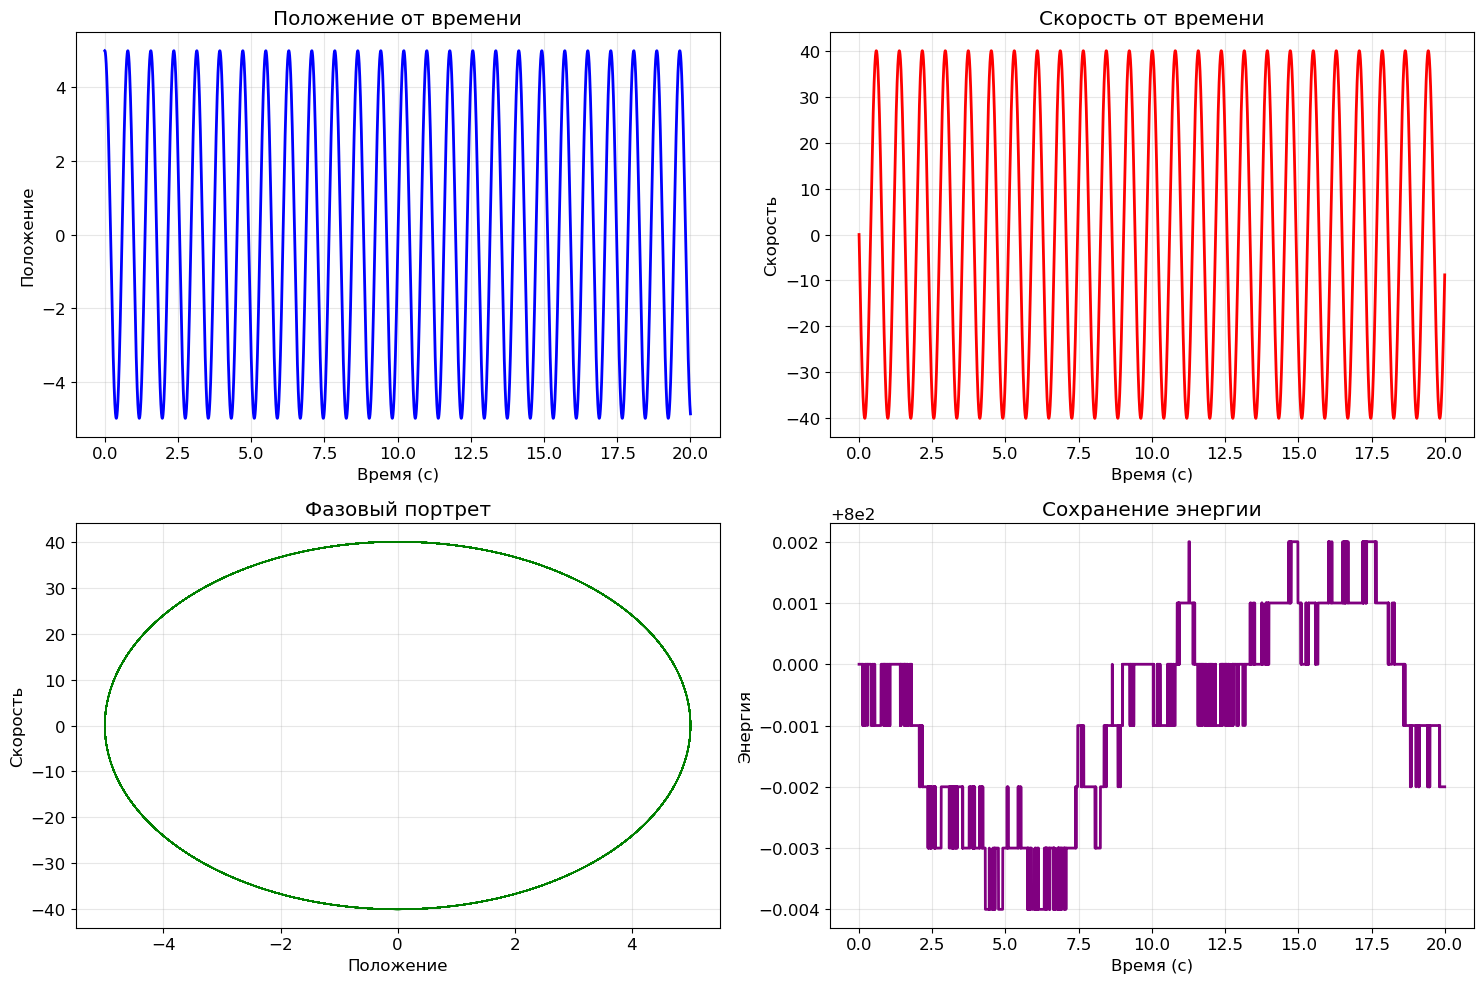

In [ ]:
# –ó–∞–ø—É—Å–∫–∞–µ–º —Å–∏–º—É–ª—è—Ü–∏—é
if sim.run_simulation():
    # –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
    sim.analyze()
    
    # –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫–∏
    sim.plot_results()

–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–µ—Ç–æ–¥–æ–≤ –∏–Ω—Ç–µ–≥—Ä–∏—Ä–æ–≤–∞–Ω–∏—è

–ó–∞–ø—É—Å–∫ –º–µ—Ç–æ–¥–∞ RK4

–°–∏–º—É–ª—è—Ü–∏—è –∑–∞–≤–µ—Ä—à–µ–Ω–∞ —É—Å–ø–µ—à–Ω–æ!

–î—Ä–µ–π—Ñ —ç–Ω–µ—Ä–≥–∏–∏ (RK4): **-0.000250%**

–ó–∞–ø—É—Å–∫ –º–µ—Ç–æ–¥–∞ Euler

–°–∏–º—É–ª—è—Ü–∏—è –∑–∞–≤–µ—Ä—à–µ–Ω–∞ —É—Å–ø–µ—à–Ω–æ!

–î—Ä–µ–π—Ñ —ç–Ω–µ—Ä–≥–∏–∏ (Euler): **0.001375%**

—Ä–∞–≤–Ω–µ–Ω–∏–µ —ç–Ω–µ—Ä–≥–∏–∏

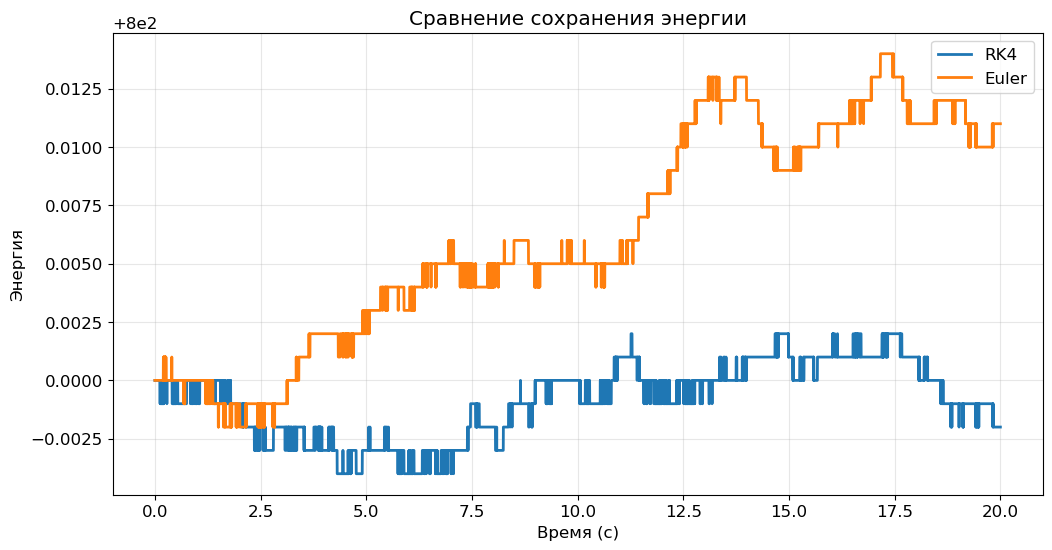

In [12]:
# –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º RK4 –∏ Euler
sim.compare_methods()

In [13]:
# –ò—Å—Å–ª–µ–¥—É–µ–º –≤–ª–∏—è–Ω–∏–µ —Ä–∞–∑–Ω—ã—Ö —á–∞—Å—Ç–æ—Ç
frequencies = [5, 10, 15]

for w in frequencies:
    display(Markdown(f"### üî¨ –ß–∞—Å—Ç–æ—Ç–∞ w = {w}"))
    
    sim.set_parameters(
        w=w,
        output_file=f"results_w{w}.csv",
        method="RK4"
    )
    
    if sim.run_simulation():
        sim.analyze()
        print("\n")

### üî¨ –ß–∞—Å—Ç–æ—Ç–∞ w = 5

–°–∏–º—É–ª—è—Ü–∏—è –∑–∞–≤–µ—Ä—à–µ–Ω–∞ —É—Å–ø–µ—à–Ω–æ!

–ê–Ω–∞–ª–∏–∑ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

–ü–∞—Ä–∞–º–µ—Ç—Ä    –ó–Ω–∞—á–µ–Ω–∏–µ
0              –ú–µ—Ç–æ–¥         RK4
1    –í—Ä–µ–º—è —Å–∏–º—É–ª—è—Ü–∏–∏      20.0 —Å
2        –®–∞–≥ –≤—Ä–µ–º–µ–Ω–∏     0.001 —Å
3  –ù–∞—á–∞–ª—å–Ω–∞—è —ç–Ω–µ—Ä–≥–∏—è  312.500000
4   –ö–æ–Ω–µ—á–Ω–∞—è —ç–Ω–µ—Ä–≥–∏—è  312.501000
5      –î—Ä–µ–π—Ñ —ç–Ω–µ—Ä–≥–∏–∏   0.000320%
6    –ú–∞–∫—Å. –ø–æ–ª–æ–∂–µ–Ω–∏–µ      5.0000
7     –ú–∞–∫—Å. —Å–∫–æ—Ä–æ—Å—Ç—å     25.0001

### üî¨ –ß–∞—Å—Ç–æ—Ç–∞ w = 10

–°–∏–º—É–ª—è—Ü–∏—è –∑–∞–≤–µ—Ä—à–µ–Ω–∞ —É—Å–ø–µ—à–Ω–æ!

–ê–Ω–∞–ª–∏–∑ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

–ü–∞—Ä–∞–º–µ—Ç—Ä     –ó–Ω–∞—á–µ–Ω–∏–µ
0              –ú–µ—Ç–æ–¥          RK4
1    –í—Ä–µ–º—è —Å–∏–º—É–ª—è—Ü–∏–∏       20.0 —Å
2        –®–∞–≥ –≤—Ä–µ–º–µ–Ω–∏      0.001 —Å
3  –ù–∞—á–∞–ª—å–Ω–∞—è —ç–Ω–µ—Ä–≥–∏—è  1250.000000
4   –ö–æ–Ω–µ—á–Ω–∞—è —ç–Ω–µ—Ä–≥–∏—è  1250.010000
5      –î—Ä–µ–π—Ñ —ç–Ω–µ—Ä–≥–∏–∏    0.000800%
6    –ú–∞–∫—Å. –ø–æ–ª–æ–∂–µ–Ω–∏–µ       5.0000
7     –ú–∞–∫—Å. —Å–∫–æ—Ä–æ—Å—Ç—å      50.0002

### üî¨ –ß–∞—Å—Ç–æ—Ç–∞ w = 15

–°–∏–º—É–ª—è—Ü–∏—è –∑–∞–≤–µ—Ä—à–µ–Ω–∞ —É—Å–ø–µ—à–Ω–æ!

–ê–Ω–∞–ª–∏–∑ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤

–ü–∞—Ä–∞–º–µ—Ç—Ä     –ó–Ω–∞—á–µ–Ω–∏–µ
0              –ú–µ—Ç–æ–¥          RK4
1    –í—Ä–µ–º—è —Å–∏–º—É–ª—è—Ü–∏–∏       20.0 —Å
2        –®–∞–≥ –≤—Ä–µ–º–µ–Ω–∏      0.001 —Å
3  –ù–∞—á–∞–ª—å–Ω–∞—è —ç–Ω–µ—Ä–≥–∏—è  2812.500000
4   –ö–æ–Ω–µ—á–Ω–∞—è —ç–Ω–µ—Ä–≥–∏—è  2812.510000
5      –î—Ä–µ–π—Ñ —ç–Ω–µ—Ä–≥–∏–∏    0.000356%
6    –ú–∞–∫—Å. –ø–æ–ª–æ–∂–µ–Ω–∏–µ       5.0000
7     –ú–∞–∫—Å. —Å–∫–æ—Ä–æ—Å—Ç—å      75.0001